# DS 7331 - Machine Learning - Course Project
Team: Allison Roderick, Jayson Barker, Sandesh Ojha, Brandon Croom

Lab Number: 1

### SVM

In [3]:
# Allison's load script
# Import libraries for data analysis
import numpy as np 
import pandas as pd 
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from IPython.display import display,HTML
from sklearn import ensemble

#The packages below will need to be installed for use.
# sorted_months_weekdays allows for easier manipulation of date fields
#from sorted_months_weekdays import Month_Sorted_Month, Weekday_Sorted_Week
#import swifter

# show all columns
pd.set_option('display.max_columns', None) 

#Set the seaborn plotting style
sns.set(style="darkgrid")

#set variables for font sizes for plots. This will allow them to be consistent within the notebook
titleFont = 25
axisFont = 15
labelFont = 15

#read in the data file
df = pd.read_csv("C:/Users/Allison/JupyterNotebook/Data/us-accidents1/US_Accidents_Dec19.csv")
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
# def getSeason(date):
#     month=pd.to_datetime(date).month
#     if month <= 3:
#         return 'Winter'
#     elif month <= 6:
#         return 'Spring'
#     elif month <= 9:
#         return 'Summer'
#     else:
#         return 'Fall'

In [7]:
# season =df['Start_Time'].apply(getSeason)
# season.head()

In [132]:
df["Severity"].value_counts()

2    1993410
3     887620
4      92337
1        968
Name: Severity, dtype: int64

In [133]:
df2 = df.copy()

In [134]:
# replace severity to binary
df2.Severity.replace([0, 1, 2, 3, 4], [0, 0, 0, 1, 1], inplace=True)

# view recoded variable
df2['Severity'].value_counts() 

0    1994378
1     979957
Name: Severity, dtype: int64

In [135]:
# transform categories into dummy numerics
cols_to_transform = ['Side','Country','Weather_Condition','Sunrise_Sunset','State','Source']
df2 = pd.get_dummies(df2, columns = cols_to_transform )
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [136]:
# impute to mean for NAs
df2['Temperature(F)'].fillna(df2['Temperature(F)'].mean(), inplace=True)
df2['Temperature(F)'].isnull().sum()

# impute to mean for NAs
df2['Precipitation(in)'].fillna(df2['Precipitation(in)'].mean(), inplace=True)
df2['Precipitation(in)'].isnull().sum()

# impute to mean for NAs
df2['Pressure(in)'].fillna(df2['Pressure(in)'].mean(), inplace=True)
df2['Pressure(in)'].isnull().sum()

# impute to mean for NAs
df2['Wind_Chill(F)'].fillna(df2['Wind_Chill(F)'].mean(), inplace=True)
df2['Wind_Chill(F)'].isnull().sum()

# impute to mean for NAs
df2['Visibility(mi)'].fillna(df2['Visibility(mi)'].mean(), inplace=True)
df2['Visibility(mi)'].isnull().sum()

# impute to mean for NAs
df2['Wind_Speed(mph)'].fillna(df2['Wind_Speed(mph)'].mean(), inplace=True)
df2['Wind_Speed(mph)'].isnull().sum()

# impute to mean for NAs
df2['Humidity(%)'].fillna(df2['Humidity(%)'].mean(), inplace=True)
df2['Humidity(%)'].isnull().sum()

# replace NAs with 0
df2['TMC'].fillna(0, inplace=True)
df2['TMC'].isnull().sum()

0

In [137]:
df2.tail()

,ID,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,City,County,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Side_,Side_L,Side_R,Country_US,Weather_Condition_Blowing Dust,Weather_Condition_Blowing Dust / Windy,Weather_Condition_Blowing Sand,Weather_Condition_Blowing Snow,Weather_Condition_Blowing Snow / Windy,Weather_Condition_Clear,Weather_Condition_Cloudy,Weather_Condition_Cloudy / Windy,Weather_Condition_Drizzle,Weather_Condition_Drizzle / Windy,Weather_Condition_Drizzle and Fog,Weather_Condition_Dust Whirls,Weather_Condition_Fair,Weather_Condition_Fair / Windy,Weather_Condition_Fog,Weather_Condition_Fog / Windy,Weather_Condition_Freezing Rain,Weather_Condition_Freezing Rain / Windy,Weather_Condition_Funnel Cloud,Weather_Condition_Hail,Weather_Condition_Haze,Weather_Condition_Haze / Windy,Weather_Condition_Heavy Blowing Snow,Weather_Condition_Heavy Drizzle,Weather_Condition_Heavy Freezing Drizzle,Weather_Condition_Heavy Freezing Rain,Weather_Condition_Heavy Ice Pellets,Weather_Condition_Heavy Rain,Weather_Condition_Heavy Rain / Windy,Weather_Condition_Heavy Rain Showers,Weather_Condition_Heavy Sleet,Weather_Condition_Heavy Smoke,Weather_Condition_Heavy Snow,Weather_Condition_Heavy Snow / Windy,Weather_Condition_Heavy Snow with Thunder,Weather_Condition_Heavy T-Storm,Weather_Condition_Heavy T-Storm / Windy,Weather_Condition_Heavy Thunderstorms and Rain,Weather_Condition_Heavy Thunderstorms and Snow,Weather_Condition_Heavy Thunderstorms with Small Hail,Weather_Condition_Ice Pellets,Weather_Condition_Light Blowing Snow,Weather_Condition_Light Drizzle,Weather_Condition_Light Drizzle / Windy,Weather_Condition_Light Fog,Weather_Condition_Light Freezing Drizzle,Weather_Condition_Light Freezing Fog,Weather_Condition_Light Freezing Rain,Weather_Condition_Light Freezing Rain / Windy,Weather_Condition_Light Hail,Weather_Condition_Light Haze,Weather_Condition_Light Ice Pellets,Weather_Condition_Light Rain,Weather_Condition_Light Rain / Windy,Weather_Condition_Light Rain Shower,Weather_Condition_Light Rain Shower / Windy,Weather_Condition_Light Rain Showers,Weather_Condition_Light Rain with Thunder,Weather_Condition_Light Sleet,Weather_Condition_Light Snow,Weather_Condition_Light Snow / Windy,Weather_Condition_Light Snow Grains,Weather_Condition_Light Snow Shower,Weather_Condition_Light Snow Showers,Weather_Condition_Light Snow and Sleet,Weather_Condition_Light Snow and Sleet / Windy,Weather_Condition_Light Snow with Thunder,Weather_Condition_Light Thunderstorm,Weather_Condition_Light Thunderstorms and Rain,Weather_Condition_Light Thunderstorms and Snow,Weather_Condition_Low Drifting Snow,Weather_Condition_Mist,Weather_Condition_Mostly Cloudy,Weather_Condition_Mostly Cloudy / Windy,Weather_Condition_N/A Precipitation,Weather_Condition_Overcast,Weather_Condition_Partial Fog,Weather_Condition_Partial Fog / Windy,Weather_Condition_Partly Cloudy,Weather_Condition_Partly Cloudy / Windy,Weather_Condition_Patches of Fog,Weather_Condition_Rain,Weather_Condition_Rain / Windy,Weather_Condition_Rain Shower,Weather_Condition_Rain Showers,Weather_Condition_Sand,Weather_Condition_Sand / Dust Whirlwinds,Weather_Condition_Sand / Dust Whirlwinds / Windy,Weather_Condition_Scattered Clouds,Weather_Condition_Shallow Fog,Weather_Condition_Showers in the Vicinity,Weather_Condition_Sleet,Weather_Condition_Small Hail,Weather_Condition_Smoke,Weather_Condition_Smoke / Windy,Weather_Condition_Snow,Weather_Condition_Snow / Windy,Weather_Condition_Snow Grains,Weather_Condition_Snow Showers,Weather_Condition_Snow and Sleet,Weather_Condition_Snow and Sleet / Windy,Weather_Condition_Snow and Thunder,Weather_Conditi

In [138]:
# Logistic regression variables
X = df2[['Side_L','Side_R','Country_US','Temperature(F)','Precipitation(in)','Pressure(in)','Wind_Chill(F)'
         ,'Visibility(mi)','Wind_Speed(mph)','Bump','Give_Way','Traffic_Signal','Sunrise_Sunset_Night'
         ,'Weather_Condition_Heavy Rain','Weather_Condition_Light Rain','Weather_Condition_Light Snow'
        ,'Weather_Condition_Haze','Weather_Condition_Drizzle','Weather_Condition_Light Fog','State_TX'
        ,'State_SC','State_NC','State_NY','State_PA','State_MI','State_GA','State_VA','State_OR','State_MN'
        ,'State_AZ','State_WA','State_WA','State_ND','State_IA','State_RI','State_WI','State_KY','State_NE'
        ,'State_CT','State_MO','State_CO','State_MD','State_NJ','State_OK','State_LA','State_TN','State_NM'
        ,'State_MS','State_MT','State_AR','State_ID','State_ME','TMC','Source_Bing','Source_MapQuest'
        ,'Source_MapQuest-Bing']]
#df2.iloc[:,47:60]
y = df2['Severity']
X.head()


,Side_L,Side_R,Country_US,Temperature(F),Precipitation(in),Pressure(in),Wind_Chill(F),Visibility(mi),Wind_Speed(mph),Bump,Give_Way,Traffic_Signal,Sunrise_Sunset_Night,Weather_Condition_Heavy Rain,Weather_Condition_Light Rain,Weather_Condition_Light Snow,Weather_Condition_Haze,Weather_Condition_Drizzle,Weather_Condition_Light Fog,State_TX,State_SC,State_NC,State_NY,State_PA,State_MI,State_GA,State_VA,State_OR,State_MN,State_AZ,State_WA,State_WA,State_ND,State_IA,State_RI,State_WI,State_KY,State_NE,State_CT,State_MO,State_CO,State_MD,State_NJ,State_OK,State_LA,State_TN,State_NM,State_MS,State_MT,State_AR,State_ID,State_ME,TMC,Source_Bing,Source_MapQuest,Source_MapQuest-Bing
0,0,1,1,36.9,0.020000,29.68,51.326849,10.0,8.298064,False,False,False,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,201.0,0,1,0
1,1,0,1,37.9,0.000000,29.65,51.326849,10.0,8.298064,False,False,False,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,201.0,0,1,0
2,0,1,1,36.0,0.020495,29.67,33.300000,10.0,3.500000,False,False,True,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,201.0,0,1,0
3,0,1,1,35.1,0.020495,29.64,31.000000,9.0,4.600000,False,False,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,201.0,0,1,0
4,0,1,1,36.0,0.020495,29.65,33.300000,6.0,3.500000,False,False,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,201.0,0,1,0


In [139]:
# split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [140]:
print(df2.loc[df2["Severity"]==1].shape)
print(df2.loc[df2["Severity"]==0].shape)
print(y.shape)

(979957, 221)
(1994378, 221)
(2974335,)


In [141]:
1994378/(979957+1994378)

0.670529042626335

In [142]:
df2['Severity'].value_counts()
#print(979957/(1994378+979957))
#0.329

0    1994378
1     979957
Name: Severity, dtype: int64

In [143]:
X = df2[['Side_L','Side_R','Country_US','Temperature(F)','Precipitation(in)','Pressure(in)','Wind_Chill(F)'
         ,'Visibility(mi)','Wind_Speed(mph)','Bump','Give_Way','Traffic_Signal','Sunrise_Sunset_Night'
         ,'Weather_Condition_Heavy Rain','Weather_Condition_Light Rain','Weather_Condition_Light Snow'
        ,'Weather_Condition_Haze','Weather_Condition_Drizzle','Weather_Condition_Light Fog','State_TX'
        ,'State_SC','State_NC','State_NY','State_PA','State_MI','State_GA','State_VA','State_OR','State_MN'
        ,'State_AZ','State_WA','State_WA','State_ND','State_IA','State_RI','State_WI','State_KY','State_NE'
        ,'State_CT','State_MO','State_CO','State_MD','State_NJ','State_OK','State_LA','State_TN','State_NM'
        ,'State_MS','State_MT','State_AR','State_ID','State_ME','TMC','Source_Bing','Source_MapQuest'
        ,'Source_MapQuest-Bing']]
#df2.iloc[:,47:60]
y = df2['Severity']
# split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [144]:
#X_train.columns
#X_train1=X_train.reset_index()
Xtemp=X_train.reset_index()

In [58]:
ytemp=y_train.to_frame().reset_index()

In [61]:
#temp=pd.concat([y_train.to_frame().reset_index(), X_train.reset_index()])

temp=ytemp.set_index('index').join(Xtemp.set_index('index'),on='index')
#temp=y_train.to_frame().append(X_train)

In [62]:
temp.head()

,Severity,Side_L,Side_R,Country_US,Temperature(F),Precipitation(in),Pressure(in),Wind_Chill(F),Visibility(mi),Wind_Speed(mph),Bump,Give_Way,Traffic_Signal,Sunrise_Sunset_Night,Weather_Condition_Heavy Rain,Weather_Condition_Light Rain,Weather_Condition_Light Snow,Weather_Condition_Haze,Weather_Condition_Drizzle,Weather_Condition_Light Fog,State_TX,State_SC,State_NC,State_NY,State_PA,State_MI,State_GA,State_VA,State_OR,State_MN,State_AZ,State_WA,State_WA,State_ND,State_IA,State_RI,State_WI,State_KY,State_NE,State_CT,State_MO,State_CO,State_MD,State_NJ,State_OK,State_LA,State_TN,State_NM,State_MS,State_MT,State_AR,State_ID,State_ME,TMC,Source_Bing,Source_MapQuest,Source_MapQuest-Bing
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2211657,0,0,1,1,91.9,0.020495,29.87,51.326849,10.0,13.8,False,False,True,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,201.0,0,1,0
211633,0,1,0,1,48.9,0.020495,30.30,51.326849,10.0,9.2,False,False,False,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,201.0,0,1,0
718063,0,1,0,1,72.0,0.000000,27.04,72.000000,10.0,3.0,False,False,True,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,222.0,0,1,0
713039,0,0,1,1,67.0,0.000000,29.02,67.000000,10.0,6.0,False,False,True,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,201.0,0,1,0
399775,0,0,1,1,60.8,0.020495,29.99,51.326849,10.0,13.8,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,201.0,0,1,0


In [64]:
from sklearn.utils import resample

df_majority = temp[temp.Severity==0]
df_minority = temp[temp.Severity==1]

df_majority_downsamp = resample(df_majority,
                               replace=False,
                               n_samples=df_minority.shape[0],
                               random_state=123)

df_downsampled = pd.concat([df_majority_downsamp, df_minority])

df_downsampled['Severity'].value_counts()

1    734733
0    734733
Name: Severity, dtype: int64

In [95]:
y_train=df_downsampled.take([0],axis=1)
X_train=df_downsampled.take(range(1,df_downsampled.shape[1]),axis=1)

In [96]:
X_test.columns

Index(['Side_L', 'Side_R', 'Country_US', 'Temperature(F)', 'Precipitation(in)',
       'Pressure(in)', 'Wind_Chill(F)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Bump', 'Give_Way', 'Traffic_Signal', 'Sunrise_Sunset_Night',
       'Weather_Condition_Heavy Rain', 'Weather_Condition_Light Rain',
       'Weather_Condition_Light Snow', 'Weather_Condition_Haze',
       'Weather_Condition_Drizzle', 'Weather_Condition_Light Fog', 'State_TX',
       'State_SC', 'State_NC', 'State_NY', 'State_PA', 'State_MI', 'State_GA',
       'State_VA', 'State_OR', 'State_MN', 'State_AZ', 'State_WA', 'State_WA',
       'State_ND', 'State_IA', 'State_RI', 'State_WI', 'State_KY', 'State_NE',
       'State_CT', 'State_MO', 'State_CO', 'State_MD', 'State_NJ', 'State_OK',
       'State_LA', 'State_TN', 'State_NM', 'State_MS', 'State_MT', 'State_AR',
       'State_ID', 'State_ME', 'TMC', 'Source_Bing', 'Source_MapQuest',
       'Source_MapQuest-Bing'],
      dtype='object')

In [145]:
# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)


In [146]:
# use some compact notation for creating a linear SVM classifier with stichastic descent
from sklearn.linear_model import SGDClassifier
from sklearn import metrics as mt

In [103]:
y_train1=y_train.to_numpy().squeeze()
y_train1.shape

(1469466,)

In [147]:
%%time
regularize_const = 0.1
iterations = 5
svm_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='hinge', n_iter_no_change=iterations, n_jobs=-1, penalty='l2')

svm_sgd.fit(X_train_scaled,y_train)
yhat = svm_sgd.predict(X_test_scaled)
    
conf = mt.confusion_matrix(y_test,yhat)
acc = mt.accuracy_score(y_test,yhat)

print('SVM:', acc)

SVM: 0.6767937448896157
Wall time: 10.9 s


In [148]:
print(conf)

[[486604  11756]
 [228575  16649]]


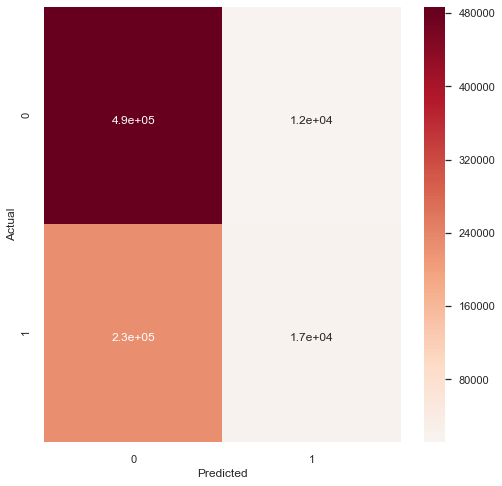

In [149]:

fig, ax = plt.subplots(figsize=(8, 8))

confusion_matrix = pd.crosstab(y_test, yhat, rownames=['Actual'], colnames=['Predicted'])


annot_kws = {"ha": 'center',"va": 'top'}
ax = sns.heatmap(confusion_matrix, annot=True, annot_kws=annot_kws, cmap ='RdBu_r', center=0)
